# Scheduling Learning Rates

From the PyTorch website ["How to adjust learning rate"](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate):

> Learning rate scheduling should be applied after optimizer’s update; e.g., you should write your code this way:

```
scheduler = ...
for epoch in range(100):
     train(...)
     validate(...)
     scheduler.step()
        
```

In [1]:
import platform; print("Platform", platform.platform())
import sys; print("Python", sys.version)
import torch; print("PyTorch", torch.__version__)
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

Platform Linux-4.15.0-1060-aws-x86_64-with-debian-buster-sid
Python 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
PyTorch 1.3.1


In [2]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(10, 20)
        self.lin2 = nn.Linear(20, 4)
        
    def forward(self, x):
        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        x = F.relu(x)
        return x

In [3]:
def train():
    optimizer.step()

def validate():
    pass

In [4]:
def run_lrs(scheduler):
    lrs = []
    for epoch in range(100):
        train()
        validate()
        scheduler.step()
        lrs.append(scheduler.get_lr()[0])
    return lrs

In [5]:
def plot_lrs(lrs, labels, title):
    plt.figure(figsize=(10,8))
    for i in range(len(lrs)):        
        plt.plot(lrs[i], label=labels[i])
    plt.title(title)
    plt.ylabel('Learning Rate')
    plt.xlabel('Training Steps')
    plt.legend();

## `StepLR`

In [6]:
from torch.optim.lr_scheduler import StepLR

In [7]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
lrs1 = run_lrs(scheduler)

scheduler = StepLR(optimizer, step_size=30, gamma=0.5)
lrs2 = run_lrs(scheduler)

scheduler = StepLR(optimizer, step_size=30, gamma=.9)
lrs3 = run_lrs(scheduler)

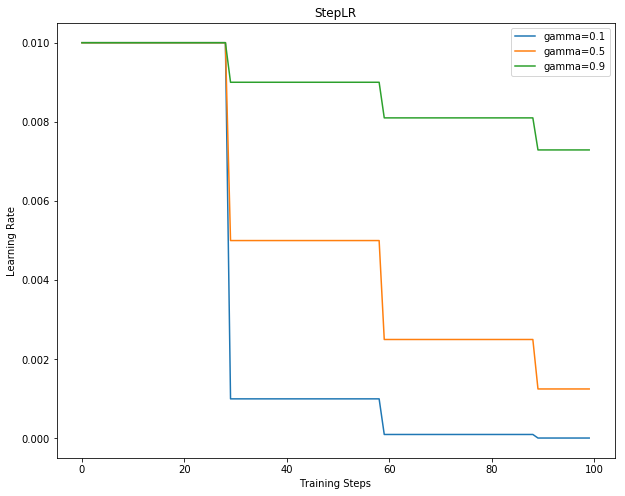

In [8]:
plot_lrs([lrs1, lrs2, lrs3], ['gamma='+ str(i) for i in [0.1, 0.5, 0.9]], 'StepLR')

## `MultiStepLR`

In [9]:
from torch.optim.lr_scheduler import MultiStepLR

In [10]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

scheduler = MultiStepLR(optimizer, milestones=[30,80], gamma=0.1)
lrs1 = run_lrs(scheduler)

scheduler = MultiStepLR(optimizer, milestones=[30,80], gamma=0.5)
lrs2 = run_lrs(scheduler)

scheduler = MultiStepLR(optimizer, milestones=[30,80], gamma=.9)
lrs3 = run_lrs(scheduler)

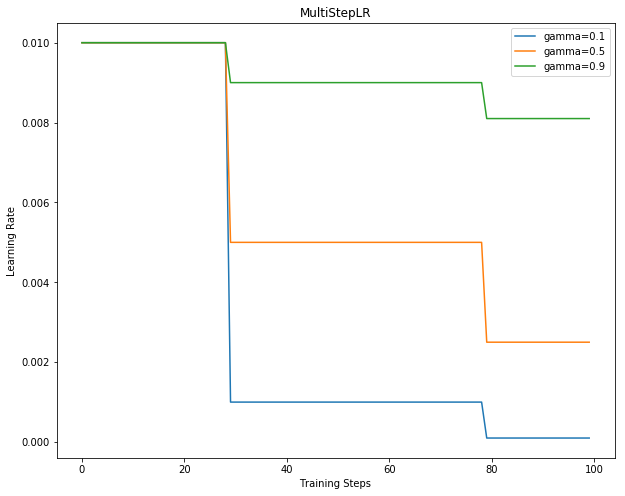

In [11]:
plot_lrs([lrs1, lrs2, lrs3], ['gamma='+ str(i) for i in [0.1, 0.5, 0.9]], 'MultiStepLR')

## `ExponentialLR`

In [12]:
from torch.optim.lr_scheduler import ExponentialLR

In [13]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

scheduler = ExponentialLR(optimizer, gamma=0.1)
lrs1 = run_lrs(scheduler)

scheduler = ExponentialLR(optimizer, gamma=0.5)
lrs2 = run_lrs(scheduler)

scheduler = ExponentialLR(optimizer, gamma=.9)
lrs3 = run_lrs(scheduler)

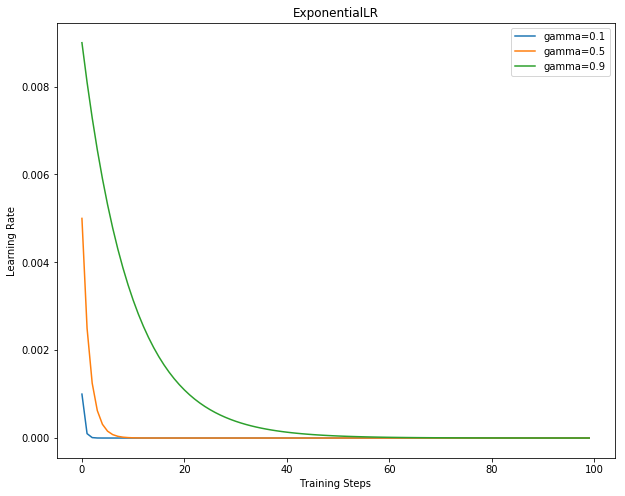

In [14]:
plot_lrs([lrs1, lrs2, lrs3], ['gamma='+ str(i) for i in [0.1, 0.5, 0.9]], 'ExponentialLR')

## `CosineAnnealingLR`

In [15]:
from torch.optim.lr_scheduler import CosineAnnealingLR

In [16]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = CosineAnnealingLR(optimizer, T_max=5)
lrs1 = run_lrs(scheduler)

scheduler = CosineAnnealingLR(optimizer, T_max=10)
lrs12 = run_lrs(scheduler)

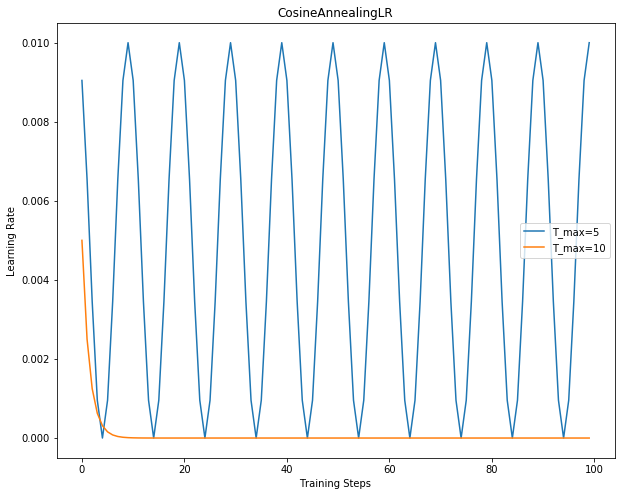

In [17]:
plot_lrs([lrs1, lrs2], ['T_max='+ str(i) for i in [5, 10]], 'CosineAnnealingLR')

## `CyclicLR`

Proposed by Leslie N. Smith in 2015 [Cyclical Learning Rates for Training Neural Networks](https://arxiv.org/abs/1506.01186)

Adapted by the PyTorch folks from [bckemnstler/CLR](https://github.com/bckenstler/CLR) repo.

In [18]:
from torch.optim.lr_scheduler import CyclicLR

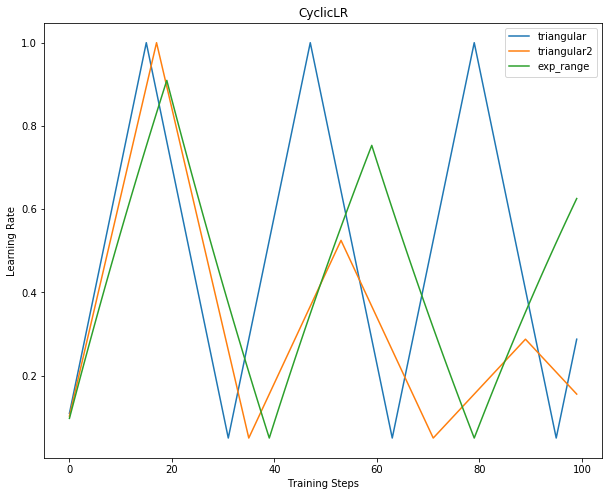

In [19]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = CyclicLR(optimizer, base_lr=0.05, max_lr=1, mode='triangular', step_size_up=16)
lrs1 = run_lrs(scheduler)

scheduler = CyclicLR(optimizer, base_lr=0.05, max_lr=1, mode='triangular2', step_size_up=18)
lrs2 = run_lrs(scheduler)

scheduler = CyclicLR(optimizer, base_lr=0.05, max_lr=1, mode='exp_range', gamma=0.995, step_size_up=20)
lrs3 = run_lrs(scheduler)

plot_lrs([lrs1, lrs2, lrs3], ['triangular','triangular2','exp_range'], 'CyclicLR')

## `OneCycleLR`

Proposed by Leslie N. Smith and Nicholay Topin in [Super-Convergence: Very Fast Training of Neural Networks Using Large Learning Rates](https://arxiv.org/abs/1708.07120) (2017)

Initial learning rate is set by:

> div_factor (python:float) – Determines the initial learning rate via initial_lr = max_lr/div_factor Default: 25

In [20]:
from torch.optim.lr_scheduler import OneCycleLR

In [21]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr=1, total_steps = 100, pct_start=0.2)
lrs1 = run_lrs(scheduler)

scheduler = OneCycleLR(optimizer, max_lr=1.5, total_steps = 100, pct_start=0.2)
lrs2 = run_lrs(scheduler)

scheduler = OneCycleLR(optimizer, max_lr=1, total_steps = 100, pct_start=0.2, anneal_strategy='linear')
lrs3 = run_lrs(scheduler)

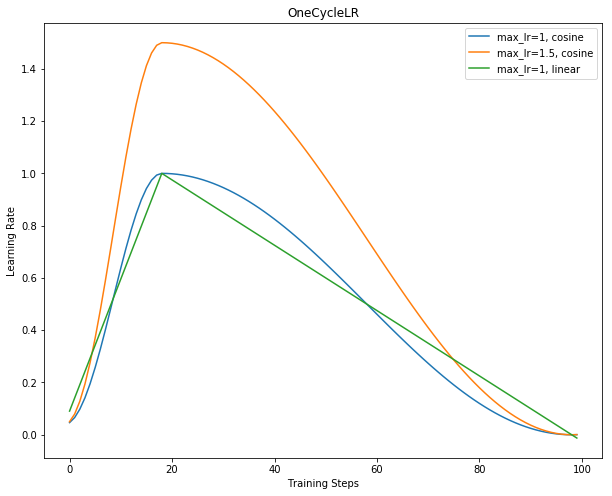

In [22]:
plot_lrs([lrs1, lrs2, lrs3], ['max_lr=1, cosine','max_lr=1.5, cosine','max_lr=1, linear'], 'OneCycleLR')

## `CosineAnnealingWarmRestarts`

In [23]:
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts

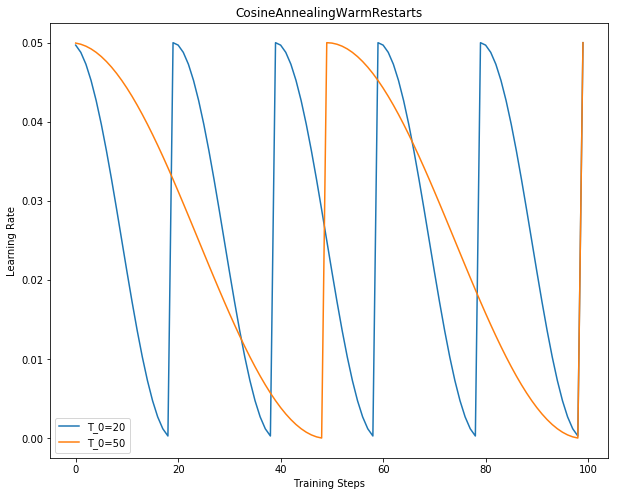

In [24]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=20)
lrs1 = run_lrs(scheduler)

scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=50)
lrs2 = run_lrs(scheduler)

plot_lrs([lrs1, lrs2], ['T_0=20','T_0=50'], 'CosineAnnealingWarmRestarts')